starting game 0
starting game 5000
starting game 10000
starting game 15000
starting game 20000
starting game 25000
starting game 30000
starting game 35000
starting game 40000
starting game 45000


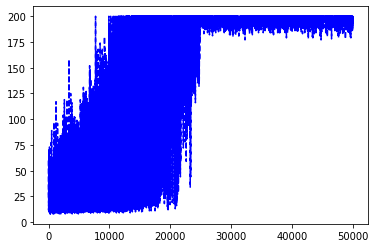

In [4]:
# import torch
import gym
import numpy as np
import matplotlib.pyplot as plt



def maxAction(Q, state):    
    values = np.array([Q[state,a] for a in range(2)])
    action = np.argmax(values)
    return action


#discretize the spaces
poleThetaSpace = np.linspace(-0.20943951, 0.20943951, 10)
poleThetaVelSpace = np.linspace(-4, 4, 10)
cartPosSpace = np.linspace(-2.4, 2.4, 10)
cartVelSpace = np.linspace(-4, 4, 10)


def getState(observation):
    cartX, cartXdot, cartTheta, cartThetadot = observation
    cartX = int(np.digitize(cartX, cartPosSpace))
    cartXdot = int(np.digitize(cartXdot, cartVelSpace))
    cartTheta = int(np.digitize(cartTheta, poleThetaSpace))
    cartThetadot = int(np.digitize(cartThetadot, poleThetaVelSpace))

    return (cartX, cartXdot, cartTheta, cartThetadot)



if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    # model hyperparameters
    ALPHA = 0.1
    GAMMA = 0.9    
    EPS = 1.0

    #construct state space
    states = []
    for i in range(len(cartPosSpace)+1):
        for j in range(len(cartVelSpace)+1):
            for k in range(len(poleThetaSpace)+1):
                for l in range(len(poleThetaVelSpace)+1):
                    states.append((i,j,k,l))

    Q = {}
    for s in states:
        for a in range(2):
            Q[s, a] = 0

    numGames = 50000
    totalRewards = np.zeros(numGames)
    for i in range(numGames):
        if i % 5000 == 0:
            print('starting game', i)
        # cart x position, cart velocity, pole theta, pole velocity
        observation = env.reset()        
        s = getState(observation)
        rand = np.random.random()
        a = maxAction(Q, s) if rand < (1-EPS) else env.action_space.sample()
        done = False
        epRewards = 0
        while not done:
            observation_, reward, done, info = env.step(a)   
            s_ = getState(observation_)
            rand = np.random.random()
            a_ = maxAction(Q, s_) if rand < (1-EPS) else env.action_space.sample()
            epRewards += reward
            Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,a_] - Q[s,a])
            s, a = s_, a_            
        EPS -= 2/(numGames) if EPS > 0 else 0
        totalRewards[i] = epRewards

    plt.plot(totalRewards, 'b--')
    plt.show()    






#Reference of code
